<a href="https://colab.research.google.com/github/shivangisehgal/prediction-of-cost-of-used-cars/blob/main/Predicting_The_Costs_Of_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

##Importing Dataset

In [ ]:
data = pd.read_csv('/content/Data_Train.csv')
data_test = pd.read_csv('/content/Data_Test.csv')

##Summarizing Dataset

In [ ]:
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.shape


(6019, 13)

In [ ]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [ ]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
data.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

##Data Cleaning

In [ ]:
#Removing kmpl,km/kg from Mileage by taking the part of the string before ' ' and storing it as float
data['Mileage'] = data['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
#Removing cc from Engine by taking the part of the string before ' ' and storing it as float
data['Engine'] = data['Engine'].apply(lambda x : str(x).split(' ')[0]).astype(float)
#Replacing null bhp as 0 bhp and then removing bhp from Power by taking the part of the string before ' ' and storing it as float
data['Power'] = data['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
#Function to conver 'Cr' in 'New_Price' to Lakh (as well as modifying the numeric value accordingly)
def crtolakh(x):
    if(str(x).find('Cr') != -1):
        returnvalue = float(str(x)[:-3])*100
        returnvalue = str(returnvalue) + " Lakh"
        return returnvalue
    else: 
      return x
#Modifying New_Price to convert Cr to Lakh
data['New_Price'].replace(np.nan, 0.0, inplace = True)
data['New_Price'] = data['New_Price'].apply(crtolakh)
data['New_Price'] = data['New_Price'].apply(lambda x : str(x).split(' ')[0]).astype(float)
#Converting 0 values to NaN
data['New_Price'].replace(0.0, np.nan, inplace = True)
data['Mileage'].replace(0.0, np.nan, inplace = True)
data['Power'].replace(0.0, np.nan, inplace = True)
data['Seats'].replace(0.0, np.nan, inplace = True)

#PERFORMING SAME STEPS FOR TEST DATASET
#Removing kmpl,km/kg from Mileage by taking the part of the string before ' ' and storing it as float
data_test['Mileage'] = data_test['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
#Removing cc from Engine by taking the part of the string before ' ' and storing it as float
data_test['Engine'] = data_test['Engine'].apply(lambda x : str(x).split(' ')[0]).astype(float)
#Replacing null as 0 and removing bhp from Power by taking the part of the string before ' ' and storing it as float
data_test['Power'] = data_test['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)#function for converting columns having value in crores to lacs

data_test['New_Price'].replace(np.nan, 0.0, inplace = True)
data_test['New_Price'] = data_test['New_Price'].apply(crtolakh)
data_test['New_Price'] = data_test['New_Price'].apply(lambda x : str(x).split(' ')[0]).astype(float)
data_test['New_Price'].replace(0.0, np.nan, inplace = True)
data_test['Mileage'].replace(0.0, np.nan, inplace = True)
data_test['Power'].replace(0.0, np.nan, inplace = True)
data_test['Seats'].replace(0.0, np.nan, inplace = True)

data.head()



,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                70
Engine                 36
Power                 143
Seats                  43
New_Price            5195
Price                   0
dtype: int64

### Encoding Categorical Data

##Data Visualization

### Univariate Plots

Bar Plots

Text(0.5, 1.0, 'Count of cars for each Location')

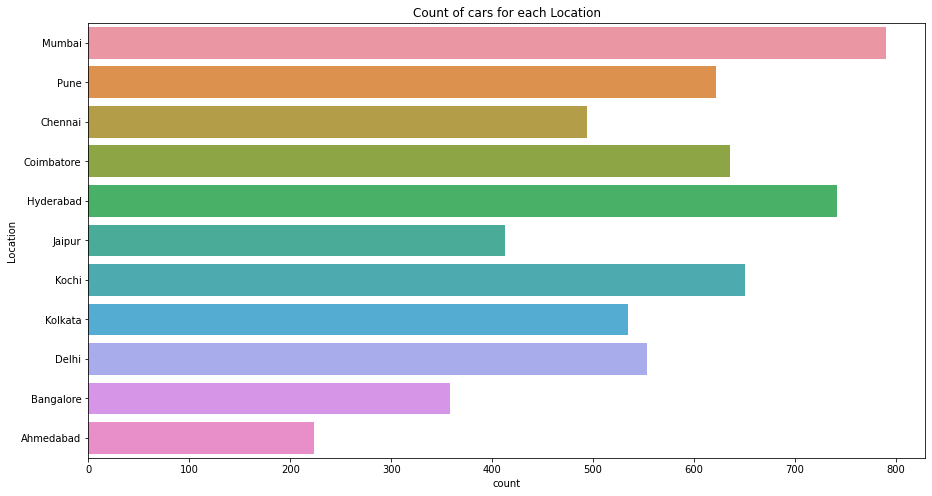

In [ ]:
#LOCATION
plt.figure(figsize=(15,8))
sns.countplot(y = 'Location', data = data).set_title('Count of cars for each Location')

Text(0.5, 1.0, 'Count of cars Vs Year of model')

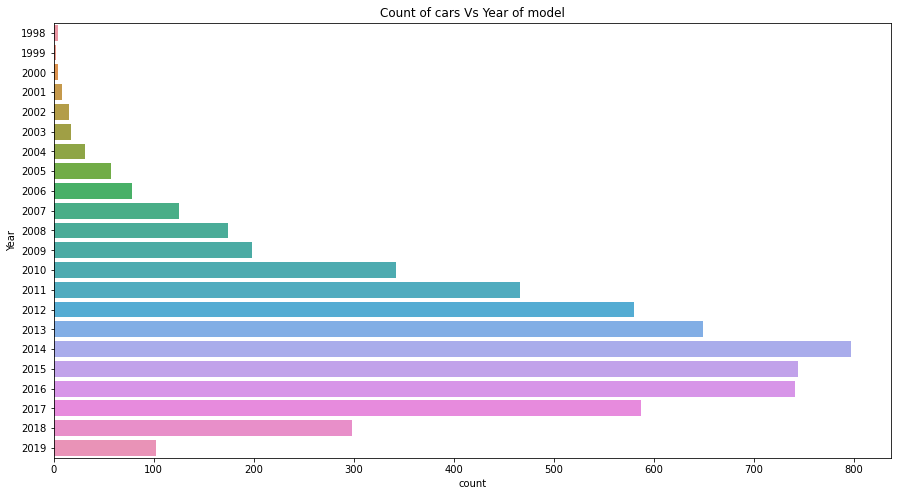

In [ ]:
#YEAR
plt.figure(figsize=(15,8))
sns.countplot(y = 'Year', data = data).set_title('Count of cars Vs Year of model')

Text(0.5, 1.0, 'Count of cars Vs Year of model')

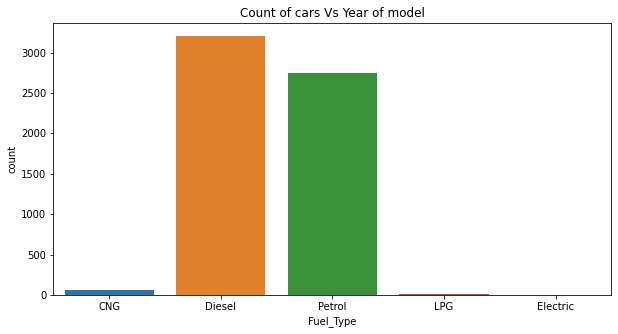

In [ ]:
#FUEL TYPE
plt.figure(figsize=(10,5))
sns.countplot(x = 'Fuel_Type', data = data).set_title('Count of cars Vs Year of model')

Box Plots

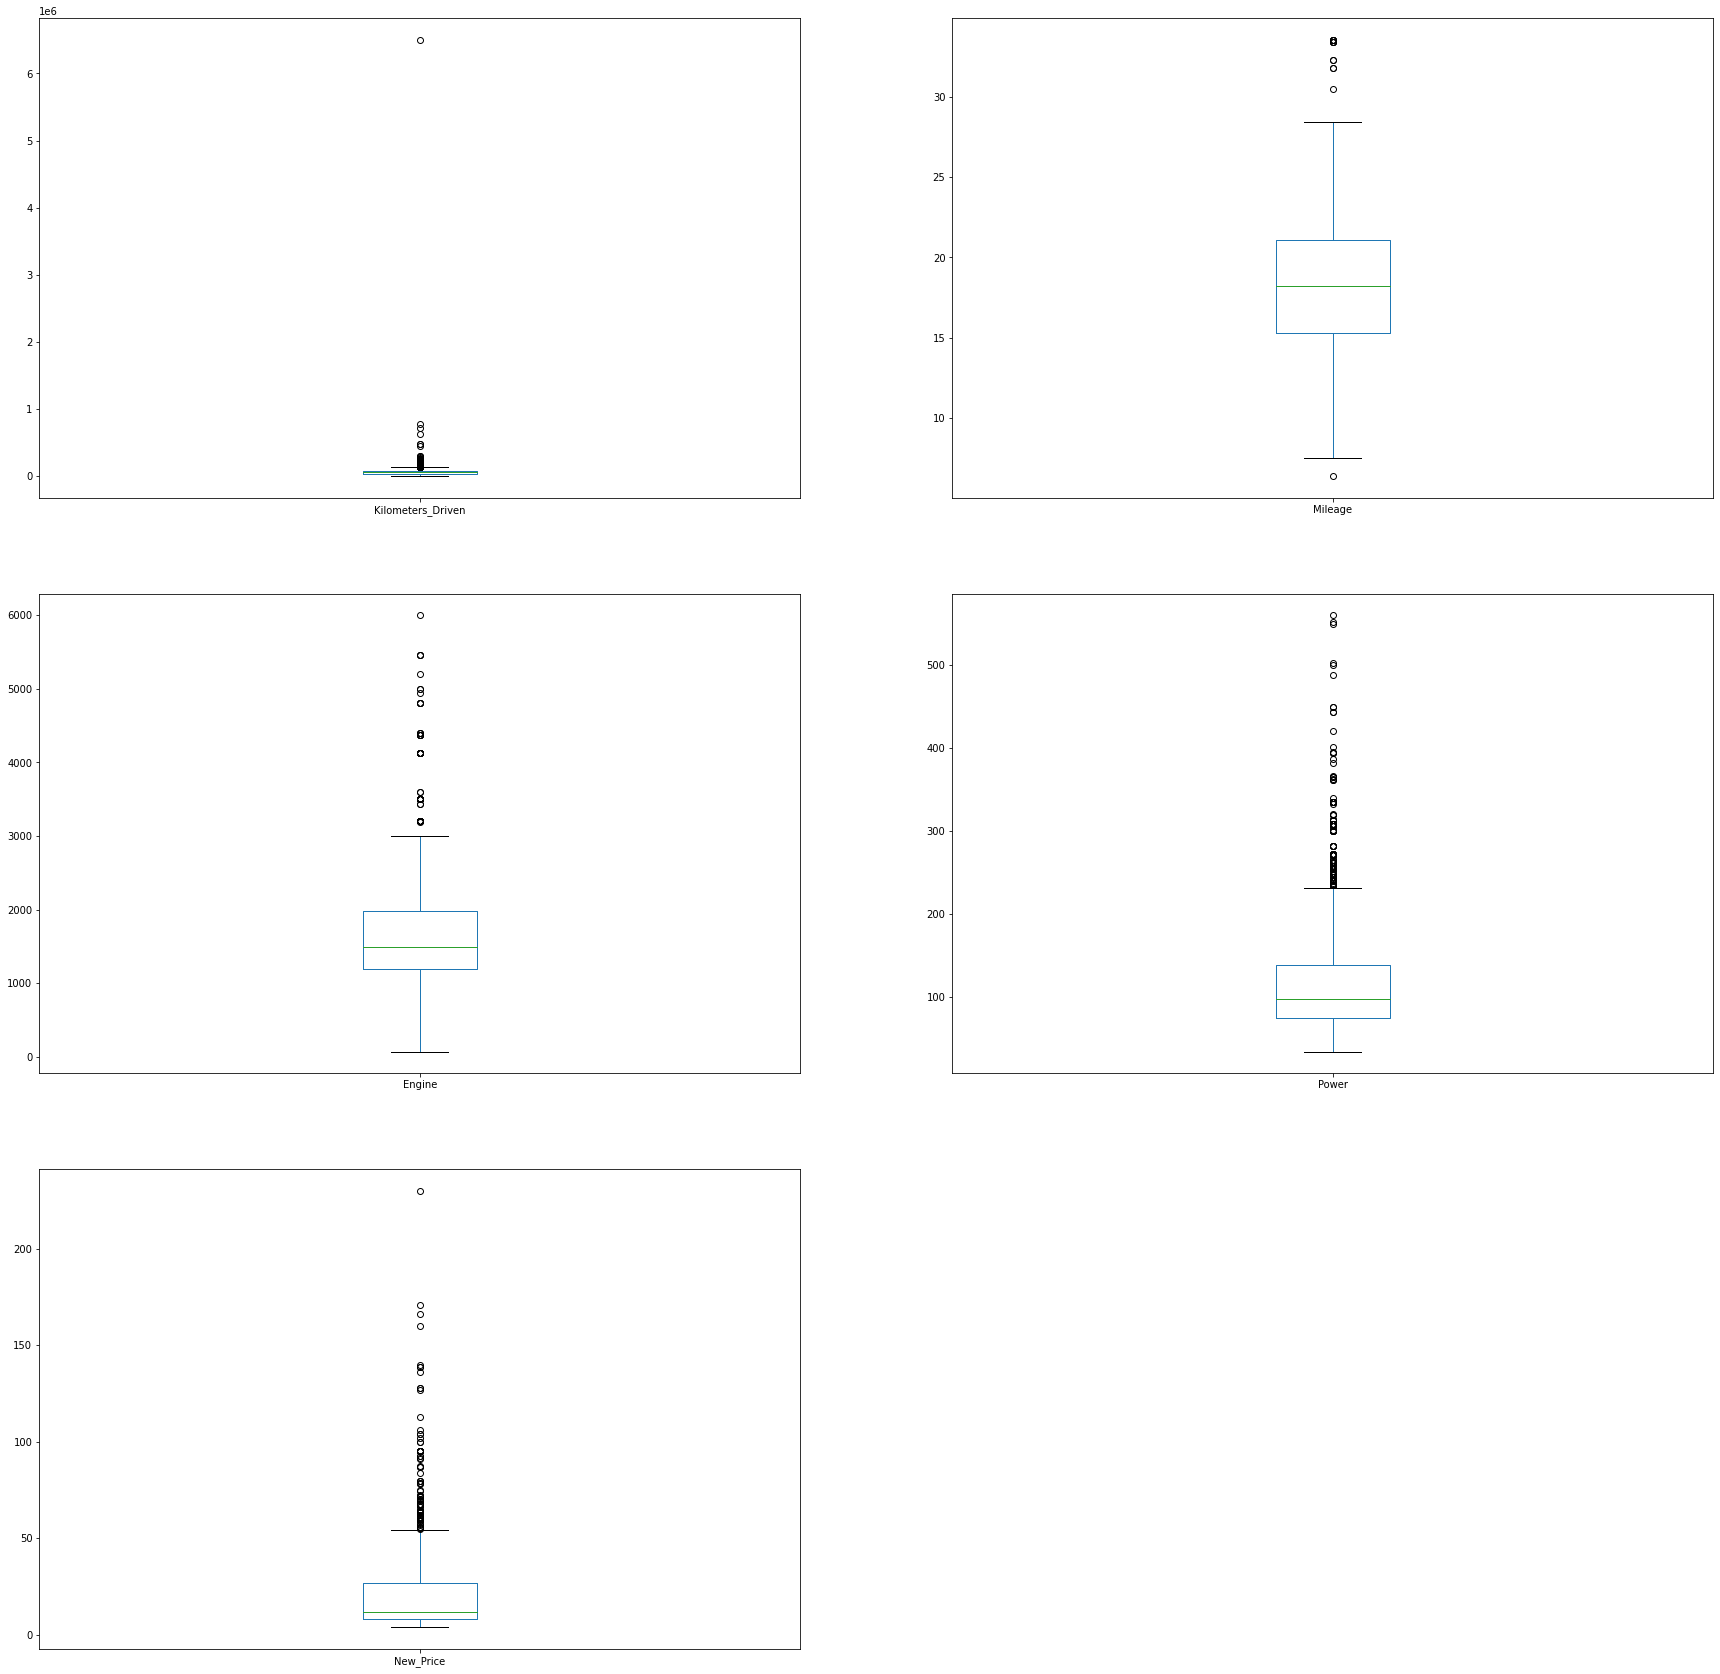

In [ ]:
numeric_data = data[['Kilometers_Driven','Mileage','Engine','Power', 'New_Price']]
numeric_data.plot(kind = 'box', subplots = True, layout = (3,2), sharex = False, sharey = False, fontsize=10, figsize = (30, 30))
plt.show()

Thus, there are outliers in every feature of numeric_data

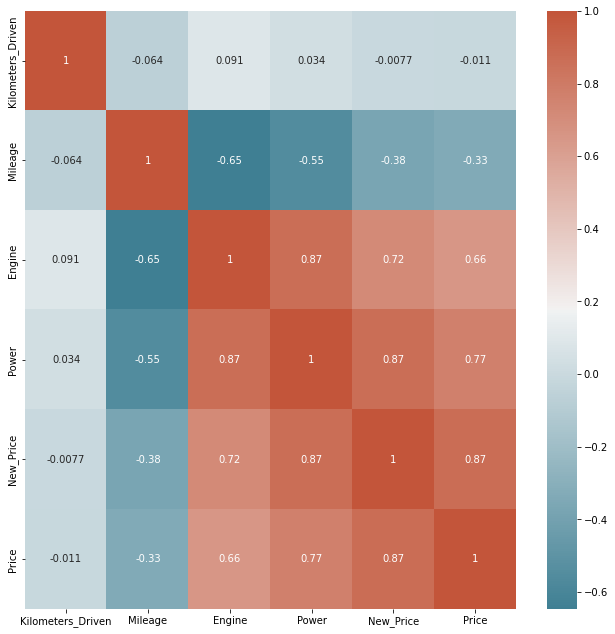

In [ ]:
numeric_data = data[['Kilometers_Driven','Mileage','Engine','Power','New_Price', 'Price']]
corrmat = numeric_data.corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, cmap = cmap, annot = True)

Engine, Power and New Price are features of importance as price is heavily correlated to them(0.66, 0.77 and 0.87 respevtively)

## Filling Missing Values

In [ ]:
#Grouping Cars by their Base Model and filling missing values with the median of the values for the repective Model
data['Base_Model'] = data['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))
data['Engine'] = data.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Engine']
data['Mileage'] = data.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Mileage']
data['Power'] = data.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Power']
data['Seats'] = data.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Seats']
#Grouping Cars by their Base Model and filling missing values of New_Price with the mean of the values of the repective Model
data['New_Price'] = data.groupby(['Base_Model']).transform(lambda x: x.fillna(x.mean()))['New_Price']

#Grouping Cars by their Company / Brand and filling the *remaining* missing values with the median of the values for the repective Company
data['Company'] = data['Name'].apply(lambda x: x.split(' ')[0])
data['Mileage'] = data.groupby(['Company']).transform(lambda x: x.fillna(x.median()))['Mileage']
data['Power'] = data.groupby(['Company']).transform(lambda x: x.fillna(x.median()))['Power']
data['Seats'] = data.groupby(['Company']).transform(lambda x: x.fillna(x.median()))['Seats']
#Grouping Cars by their Company / Brand and filling the *remaining* missing values of New_Price with the mean of the values for the repective Company
data['New_Price'] = data.groupby(['Company']).transform(lambda x: x.fillna(x.mean()))['New_Price']

#Filling the final *remaining* missing values with the overall median of the values
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())
data['Engine'] = data['Engine'].fillna(data['Engine'].median())
data['Power'] = data['Power'].fillna(data['Power'].median())
data['Seats'] = data['Seats'].fillna(data['Seats'].median())
#Filling the final *remaining* missing values of New_Price with the overall mean of the values
data['New_Price'] = data['New_Price'].fillna(data['New_Price'].mean())


#PERFORMING SAME STEPS FOR TEST DATASET
data_test['Base_Model'] = data_test['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))
data_test['Engine'] = data_test.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Engine']
data_test['Mileage'] = data_test.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Mileage']
data_test['Power'] = data_test.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Power']
data_test['Seats'] = data_test.groupby(['Base_Model']).transform(lambda x: x.fillna(x.median()))['Seats']
data_test['New_Price'] = data_test.groupby(['Base_Model']).transform(lambda x: x.fillna(x.mean()))['New_Price']
data_test['Company'] = data_test['Name'].apply(lambda x: x.split(' ')[0])
data_test['Mileage'] = data_test.groupby(['Company']).transform(lambda x: x.fillna(x.median()))['Mileage']
data_test['Power'] = data_test.groupby(['Company']).transform(lambda x: x.fillna(x.median()))['Power']
data_test['Seats'] = data_test.groupby(['Company']).transform(lambda x: x.fillna(x.median()))['Seats']
data_test['New_Price'] = data_test.groupby(['Company']).transform(lambda x: x.fillna(x.mean()))['New_Price']
data_test['Mileage'] = data_test['Mileage'].fillna(data_test['Mileage'].median())
data_test['Engine'] = data_test['Engine'].fillna(data_test['Engine'].median())
data_test['Power'] = data_test['Power'].fillna(data_test['Power'].median())
data_test['Seats'] = data_test['Seats'].fillna(data_test['Seats'].median())
data_test['New_Price'] = data_test['New_Price'].fillna(data_test['New_Price'].mean())


data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Base_Model           0
Company              0
dtype: int64

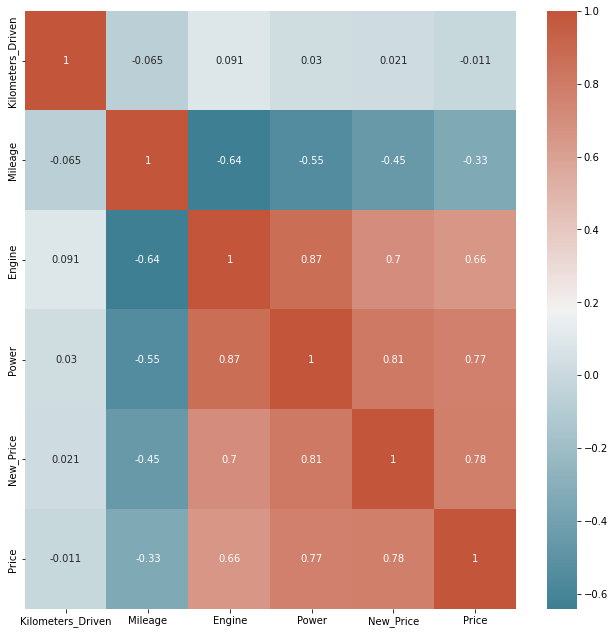

In [ ]:
numeric_data = data[['Kilometers_Driven','Mileage','Engine','Power','New_Price', 'Price']]
corrmat = numeric_data.corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, cmap = cmap, annot = True)

Dependence still remains significant on the previously stated features

## Outlier Removal Using IQR

In [ ]:

outlier_dataset = data[['Mileage','Engine']]
outlier_dataset_skew = data[['Kilometers_Driven','Power','New_Price']]
Q1 = outlier_dataset.quantile(0.25)
Q1_s = outlier_dataset_skew.quantile(0.25)
Q3 = outlier_dataset.quantile(0.75)
Q3_s = outlier_dataset_skew.quantile(0.75)

IQR = Q3 - Q1
IQR_s = Q3_s - Q1_s
Min = Q1 - (1.5*IQR)
Max = Q3 + (1.5*IQR)
Min_s = Q1_s - (3*IQR_s)
Max_s = Q3_s + (3*IQR_s) 


In [ ]:

data_temp = data.copy()


In [ ]:

data_temp = data_temp[~((data_temp[['Engine','Mileage']] < Min) | (data_temp[['Engine','Mileage']] > Max)).any(axis=1)]
data_temp = data_temp[~((data_temp[['Kilometers_Driven','Power','New_Price']] < Min_s) | (data_temp[['Kilometers_Driven','Power','New_Price']] > Max_s)).any(axis=1)]


In [ ]:
data.shape

(6019, 15)

In [ ]:
data_temp.shape

(5512, 15)

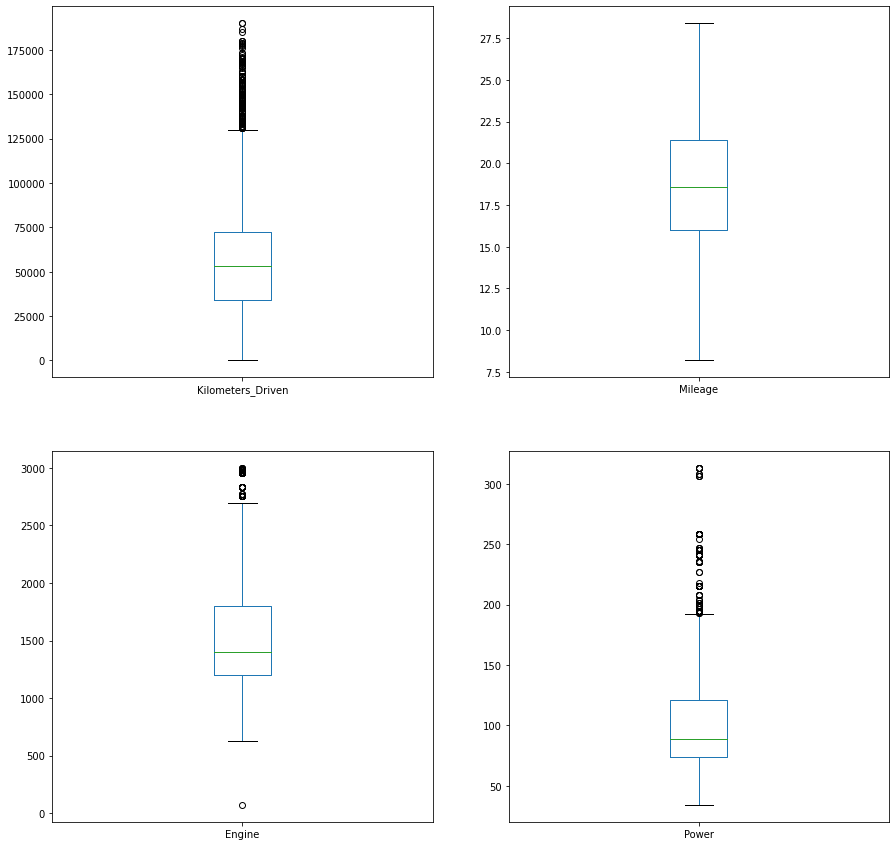

In [ ]:

numeric_data = data_temp[['Kilometers_Driven','Mileage','Engine','Power']]
numeric_data.plot(kind='box', subplots = True, layout=(2,2), sharex = False, sharey = False, fontsize=10, figsize = (15, 15))
plt.show()


## Feature Encoding

In [ ]:
label_encoder = LabelEncoder()
y = data_temp.Price
X = data_temp.drop(['Company', 'Base_Model','Price'],axis=1)
X_obj = X.select_dtypes(exclude=['int64','float64'])
X_num = X.select_dtypes(include=['int64','float64'])
X_encoded = X_obj.apply(LabelEncoder().fit_transform)
X = X_num.join(X_encoded)

#PERFORMING SAME STEPS FOR TEST DATASET
X_test = data_test.drop(['Company', 'Base_Model'],axis=1)
X_obj_test = X_test.select_dtypes(exclude=['int64','float64'])
X_num_test = X_test.select_dtypes(include=['int64','float64'])
X_encoded_test = X_obj_test.apply(LabelEncoder().fit_transform)
X_test = X_num_test.join(X_encoded_test)


## Feature Normalization

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Building Model

## RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X_train,  y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_train_pred_rfr = reg.predict(X_train)
y_val_pred_rfr = reg.predict(X_val)
y_test_pred_rfr = reg.predict(X_test)

Score

In [ ]:
rfr_train_RMSE = np.sqrt(mean_squared_error(y_train,y_train_pred_rfr))
rfr_val_RMSE = np.sqrt(mean_squared_error(y_val,y_val_pred_rfr))
print('RandomForestRegressor Train RMSE: ', rfr_train_RMSE)
print('RandomForestRegressor Validation RMSE: ', rfr_val_RMSE)

RandomForestRegressor Train RMSE:  0.6858765222371338
RandomForestRegressor Validation RMSE:  1.606821459787969


In [ ]:
rfr_train_score = reg.score(X_train, y_train)
rfr_val_score = reg.score(X_val, y_val)
print('Train Score: ', rfr_train_score)
print('Validation Score: ', rfr_val_score)

Train Score:  0.9913967420429581
Validation Score:  0.9495671380480117


In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
clf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_train_pred_clf = clf.predict(X_train)
y_val_pred_clf = clf.predict(X_val)
y_test_pred_clf = clf.predict(X_test)

In [ ]:
clf_train_RMSE = np.sqrt(mean_squared_error(y_train,y_train_pred_clf))
clf_val_RMSE = np.sqrt(mean_squared_error(y_val,y_val_pred_clf))
print('GradientBoostingRegressor Train RMSE: ', clf_train_RMSE)
print('GradientBoostingRegressor Validation RMSE: ', clf_val_RMSE)

GradientBoostingRegressor Train RMSE:  0.4447037466947167
GradientBoostingRegressor Validation RMSE:  1.6079052567768193


In [ ]:
clf_train_score = clf.score(X_train, y_train)
clf_val_score = clf.score(X_val, y_val)
print('Train Score: ', clf_train_score)
print('Validation Score: ', clf_val_score)

Train Score:  0.9963832986556822
Validation Score:  0.9494990814294466


RandomForestRegressor and GradientBoostingRegressor have approximately same accuracies for validation data

In [ ]:
y_test_pred =  clf.predict(X_test)
y_test_pred.shape

(1234,)

In [ ]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.columns = ['Price']
y_test_pred.to_csv('/drive/My Drive/MachineHack/submission5.csv', index=False)